<a href="https://colab.research.google.com/github/hermescosta/Hermes-2025-/blob/main/An%C3%A1lise_de_portf%C3%B3lio_RBras_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este estudo teve início no meu primeiro ano da graduação em Bacharelado em Estatística, com o objetivo de aplicar técnicas estatísticas descritivas em um contexto prático e acessível. A análise foi conduzida com foco na visualização e interpretação de dados de um portfólio de ações, permitindo uma compreensão mais intuitiva dos padrões de comportamento dos ativos. O trabalho foi apresentado na RBras 2023, realizada na cidade de Londrina, destacando-se pela abordagem visual e pela capacidade de extrair insights relevantes mesmo com ferramentas estatísticas iniciais.

# **Análise de Portfólio**

# Introdução

No campo da avaliação de investimentos, a compreensão do nível de risco associado a um ativo desempenha um papel fundamental. O risco é um fator crucial na determinação da taxa de desconto utilizada para trazer os fluxos de caixa futuros a valor presente. A taxa de desconto, por sua vez, reflete o risco ao qual o capital investido está exposto em uma empresa, afetando diretamente a avaliação de projetos e a tomada de decisão dos investidores.

No contexto dos investimentos, o risco está intimamente relacionado à probabilidade real de obter um retorno inferior ao esperado. Os investidores, conscientes desse risco, exigem uma taxa de retorno maior para compensar a incerteza e o potencial de perdas. Essa relação positiva entre risco e retorno esperado implica que projetos com maior volatilidade esperada exigiriam um prêmio de risco maior para atrair investidores.


# Objetivo

 Calcular estatísticas descritivas, como volatilidade, matriz de correlação, índice de Sharp e VaR, a fim de ajudar os investidores a compreender os riscos e retornos envolvidos na seleção de uma carteira de investimentos e, assim, minimizar perdas.

 Inicialmente importamos as bilbiotecas necessarias:



*   YFinance: permite acessar dados financeiros do Yahoo Finance diretamente no Python.
*   NumPy: biblioteca para computação numérica.
*   Matplotlib: para visualização gráfica dos dados, permitindo criar gráficos de linha, barras, histogramas...
*   Pandas: manipulação e análise dos dados







In [2]:
# importar as bibliotecas
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Obtenção dos Dados

O portfólio analisado é composto pelos seguintes ativos da bolsa de valores brasileira: PETR4.SA, VALE3.SA, ITUB4.SA, BBDC4.SA e BBAS3.SA. Para cada um desses ativos, foram coletados os preços históricos de fechamento diário no período de 1º de janeiro de 2022 a 31 de dezembro de 2022. A coleta foi realizada utilizando a biblioteca yfinance, que permite acesso automatizado e direto à base de dados do Yahoo Finance, facilitando o processo de extração e manipulação das séries temporais financeiras.

Definimos abaixo o período de análise, que compreende do início ao fim do ano de 2022.
Essas datas serão utilizadas para filtrar os dados históricos de cada ativo.

In [3]:
# período de tempo
data_inicio = '2022-01-01'
data_fim = '2022-12-31'


Selecionamos os ativos que compõem o portfólio a ser analisado.
 Cada código representa uma ação negociada na B3.

In [4]:
# ações do portfólio
acoes = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA']


Utilizamos a função "download" da biblioteca yfinance para obter dados historicos, dos preços de fechamento das ações.

In [5]:
# dados históricos
dados = yf.download(acoes, start=data_inicio, end=data_fim)


/tmp/ipython-input-1658336929.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(acoes, start=data_inicio, end=data_fim)
[*********************100%***********************]  5 of 5 completed


In [ ]:
dados.shape


(250, 25)

In [ ]:
dados.head()


Price           Close                                                   High  \
Ticker       BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   
Date                                                                           
2022-01-03  11.249743  14.171027  15.770364  10.843152  57.766422  11.616667   
2022-01-04  11.261453  14.263939  16.217602  10.884155  57.085060  11.378556   
2022-01-05  11.074089  14.163087  15.909669  10.462954  57.625710  11.312199   
2022-01-06  11.163866  14.364796  16.232254  10.455500  58.788429  11.265356   
2022-01-07  11.175579  14.573719  16.591505  10.503954  62.209980  11.249745   

Price                                                   ...       Open  \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  ...   BBAS3.SA   
Date                                                    ...              
2022-01-03  14.336560  15.990314  10.891609  59.225396  ...  11.370749   
2022-01-04  14.350387  16.261591  10.958704  58.558842  ...  11.366846   
2022-01-05  14.350392  16.290916  10.910248  58.270029  ...  11.249744   
2022-01-06  14.400817  16.305571  10.679147  59.506807  ...  11.093604   
2022-01-07  14.573719  16.606168  10.544956  62.209980  ...  11.167773   

Price                                                     Volume             \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  BBAS3.SA   BBDC4.SA   
Date                                                                          
2022-01-03  13.969509  15.521089  10.638143  58.507017  32338600   35620970   
2022-01-04  14.177491  15.851019  10.869245  58.144111  23429600  110060060   
2022-01-05  14.227923  16.195603  10.880428  57.299851  26325600   45808070   
2022-01-06  14.112655  15.865673  10.544959  58.240391  20271000   36651120   
2022-01-07  14.386414  16.195596  10.477862  59.543839  16377400   84778540   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2022-01-03  36138190  52704700  18557200  
2022-01-04  48343460  51739200  18178700  
2022-01-05  34807190  78459800  22039000  
2022-01-06  39441490  61163100  22044100  
2022-01-07  47174930  47507600  35213100  

[5 rows x 25 columns]

In [ ]:
dados.tail()


Price           Close                                                   High  \
Ticker       BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   
Date                                                                           
2022-12-23  14.679564  12.043997  19.202602  14.997813  70.064392  14.829356   
2022-12-26  14.658763  11.757611  18.821445  14.890342  70.705620  14.800233   
2022-12-27  14.171939  11.701929  18.714718  14.991842  72.393913  14.750300   
2022-12-28  14.425755  12.059906  19.095879  14.806755  72.231590  14.479846   
2022-12-29  14.450719  12.051953  19.057766  14.627643  72.142303  14.579707   

Price                                                   ...       Open  \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  ...   BBAS3.SA   
Date                                                    ...              
2022-12-23  12.155367  19.446542  15.057517  70.226726  ...  14.367499   
2022-12-26  12.036039  19.194978  15.105278  71.054643  ...  14.800233   
2022-12-27  11.916716  18.851934  15.111251  72.767286  ...  14.750300   
2022-12-28  12.115591  19.210225  15.117220  73.221843  ...  14.188585   
2022-12-29  12.314471  19.423675  14.956018  73.010803  ...  14.492329   

Price                                                     Volume            \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  BBAS3.SA  BBDC4.SA   
Date                                                                         
2022-12-23  11.892850  19.080633  14.406736  69.220242  17488800  21104200   
2022-12-26  12.004219  19.019647  14.997810  70.145557   9105400  13937200   
2022-12-27  11.884896  18.798572  15.075428  71.428010  17731600  78235200   
2022-12-28  11.733748  18.867186  14.985870  72.393930  21450400  45117800   
2022-12-29  12.131504  19.240720  14.920195  72.239708  18673000  41911700   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2022-12-23  27860030  68387900  18656500  
2022-12-26  17303880  28765200  18407500  
2022-12-27  18923960  50803200  26720300  
2022-12-28  24966040  57293500  23314500  
2022-12-29  27279670  57901800  40110800  

[5 rows x 25 columns]

In [ ]:
dados['Close'].head()


Ticker,BBAS3.SA,BBDC4.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,
2022-01-03,11.201031,13.926048,15.770365,10.843151,57.766415
2022-01-04,11.212688,14.017354,16.217592,10.884156,57.085072
2022-01-05,11.026135,13.918248,15.909665,10.462952,57.625694
2022-01-06,11.115525,14.116471,16.232254,10.455497,58.788429
2022-01-07,11.127186,14.321774,16.591503,10.503954,62.209980


In [ ]:
dados['Close']['PETR4.SA'].head()


,PETR4.SA
Date,
2022-01-03,10.843151
2022-01-04,10.884156
2022-01-05,10.462952
2022-01-06,10.455497
2022-01-07,10.503954


# Análises

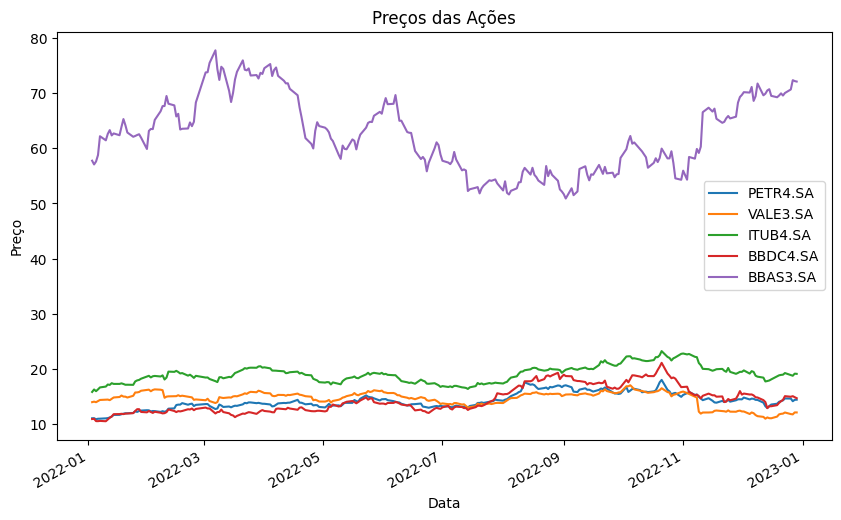

In [6]:
# Gráfico de preços das ações
dados['Close'].plot(title='Preços das Ações', figsize=(10, 6))
plt.ylabel('Preço')
plt.xlabel('Data')
plt.legend(acoes)
plt.show()

Em seguida, calcula-se a variação percentual diária do preço de cada ação, a qual é essencial para os cálculos das estatísticas descritivas

A variação percentual é dada por $ \frac{\text{Preço atual} - \text{Preço anterior}}{\text{Preço anterior}} $.


In [8]:

# Calcular os retornos percentuais diários
retornos = dados['Close'].pct_change()


Podendo ser calculadas a partir do desvio padrão, das variações percentuais diárias de cada ativo, indicando a magnitude da flotação do ativo em um determinado período de tempo, temos a volatilidade e seus respectivos resultados.

In [9]:

# Calcular a volatilidade (desvio padrão) dos retornos
volatilidades = retornos.std()


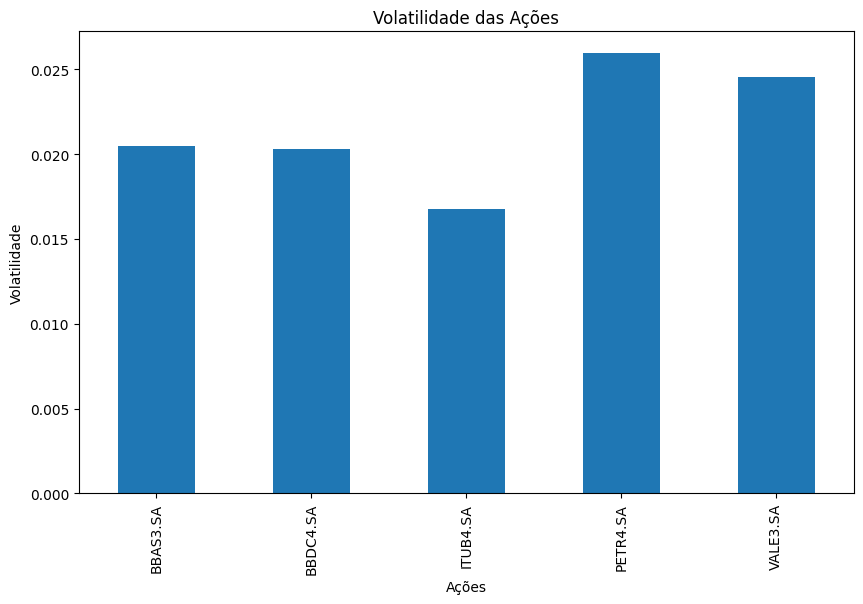

In [10]:
# Gráfico de volatilidade das ações
volatilidades.plot(kind='bar', title='Volatilidade das Ações', figsize=(10, 6))
plt.ylabel('Volatilidade')
plt.xlabel('Ações')
plt.show()



O grau de relacionamento entre duas variáveis, é determinado pelo coeficiente de Pearson, sendo o necessário para o cálculo, da matriz de correlação, a qual, permite uma boa visualização, da existência de uma correlação forte e positiva entre duas variáveis.    


In [12]:

# Calcular a matriz de correlação dos retornos
matriz_correlacao = retornos.corr()


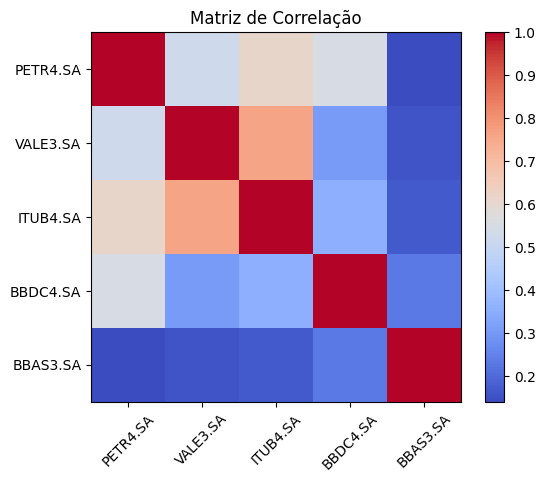

In [13]:
# Gráfico de matriz de correlação
plt.imshow(matriz_correlacao, cmap='coolwarm', interpolation='nearest')
plt.title('Matriz de Correlação')
plt.colorbar()
tick_marks = np.arange(len(acoes))
plt.xticks(tick_marks, acoes, rotation=45)
plt.yticks(tick_marks, acoes)
plt.show()